# *Kolmogorov-Arnold Networks (KAN) without tears*

In [1]:
%matplotlib inline
import numpy as np
from feed_forward_network.feedforward import FeedForward
from neuron.neuron_nn import NeuronNN
from neuron.neuron_kan import NeuronKAN
import matplotlib.pyplot as plt
from utils.activations import tanh_act, relu, sigmoid_act
from utils.basis import get_bsplines

color_plots = {'dataset': 'b',
               'kan': 'orange',
               'mlp': 'green'}

## **1D regression**

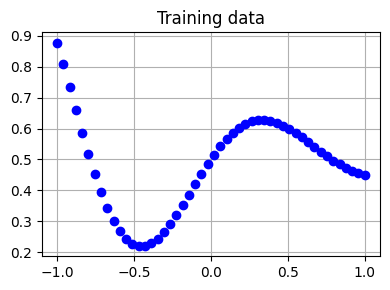

In [2]:
x_train = np.linspace(-1, 1, 50).reshape(-1, 1)
y_train = .5 * np.sin(4 * x_train) * np.exp(-(x_train+1)) + .5  # damped sinusoid

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x_train, y_train, 'o', color=color_plots['dataset'])
ax.set_title('Training data')
ax.grid()
fig.tight_layout()

## Training
### Parameters

In [3]:
n_iter_train_1d = int(5e3)
loss_tol_1d = .015
seed = 476

### KAN

In [4]:
kan_1d = FeedForward([1, 2, 2, 1],  # layer size
                  eps=.01,  # gradient descent parameter
                  n_par_per_edge=7,  # n. basis
                  neuron_class=NeuronKAN, 
                  x_bounds=[-1, 1],  # input domain bounds
                  get_basis=get_bsplines,  # basis type (B-splines ot Chebyshev)
                  seed=seed,
                  params_range=[-1, 1])
kan_1d.train(x_train, 
          y_train, 
          n_iter_max=n_iter_train_1d, 
          loss_tol=loss_tol_1d)

 12%|████▎                             | 625/5000 [00:26<03:04, 23.76it/s, loss: 0.010. Convergence has been attained!]


### MLP

In [5]:
mlp_1d = FeedForward([1, 13, 1],  # layer size
                  eps=.0005,  # gradient descend parameter
                  activation=relu,  # activation type (ReLU, tanh or sigmoid)
                  neuron_class=NeuronNN, 
                  seed=seed,
                  params_range=[-.5, .5])
mlp_1d.train(x_train, 
          y_train, 
          n_iter_max=n_iter_train_1d, 
          loss_tol=loss_tol_1d)

100%|█████████████████████████████████████████████████████████████████| 5000/5000 [01:38<00:00, 50.74it/s, loss: 0.072]


## Plots
### Regression

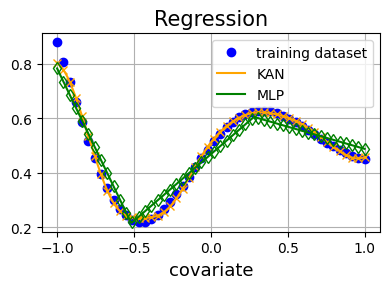

In [6]:
# Regression on training data
fig, ax = plt.subplots(figsize=(4,3))
x_plot = np.linspace(x_train[0], x_train[-1], 1000).reshape(-1, 1)
ax.plot(x_train, y_train, 'o', color=color_plots['dataset'], label='training dataset')
ax.plot(x_plot, [kan_1d(x) for x in x_plot], color=color_plots['kan'], label='KAN')
ax.plot(x_train, [kan_1d(x) for x in x_train], 'x', color=color_plots['kan'], fillstyle='none')
ax.plot(x_plot, [mlp_1d(x) for x in x_plot], color=color_plots['mlp'], label='MLP')
ax.plot(x_train, [mlp_1d(x) for x in x_train], 'd', color=color_plots['mlp'], fillstyle='none')
ax.set_xlabel('covariate', fontsize=13)
ax.set_title('Regression', fontsize=15)
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

### Loss evolution

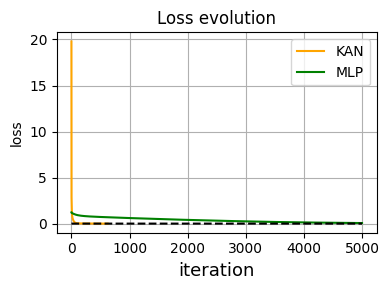

In [7]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(kan_1d.loss_hist, '-', color=color_plots['kan'], label='KAN')
ax1.plot(mlp_1d.loss_hist, '-', color=color_plots['mlp'], label='MLP')
ax1.plot(loss_tol_1d * np.ones(max(len(mlp_1d.loss_hist), len(kan_1d.loss_hist))), '--k')
ax1.grid()
ax1.set_ylabel('loss')
ax1.set_xlabel('iteration', fontsize=13)
ax1.legend()
ax1.set_title('Loss evolution')
fig1.tight_layout()
plt.show()

## **2D regression**

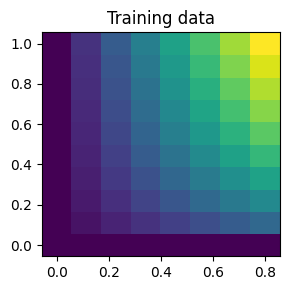

In [28]:
def fun2d(X1, X2):
    return X1 * np.power(X2, .5)

X1, X2 = np.meshgrid(np.linspace(0, .8, 8), np.linspace(0, 1, 10))
Y_training = fun2d(X1, X2)

x_train2d = np.concatenate((X1.reshape(-1, 1), X2.reshape(-1, 1)), axis=1)
y_train2d = Y_training.reshape(-1, 1)

f, a = plt.subplots(figsize=(3,3))
a.pcolor(X1, X2, Y_training)
a.set_title('Training data')
f.tight_layout()
plt.show()

## Training
### Parameters

In [9]:
n_iter_train_2d = int(5e3)
loss_tol_2d = .05
seed = 476

### KAN

In [10]:
kan_2d = FeedForward([2, 2, 1],  # layer size
                  eps=.01,  # gradient descent parameter
                  n_par_per_edge=10,  # n. basis
                  neuron_class=NeuronKAN, 
                  x_bounds=[-1, 1],  # input domain bounds
                  get_basis=get_bsplines,  # basis type (B-splines ot Chebyshev)
                  seed=seed,
                  params_range=[-1, 1])
kan_2d.train(x_train2d, 
          y_train2d, 
          n_iter_max=n_iter_train_2d, 
          loss_tol=loss_tol_2d)

 24%|███████▉                         | 1194/5000 [01:04<03:26, 18.46it/s, loss: 0.050. Convergence has been attained!]


### MLP

In [11]:
mlp_2d = FeedForward([2, 6, 1],  # layer size
                     eps=.001,  # gradient descend parameter
                     activation=relu,  # activation type (ReLU, tanh or sigmoid)
                     neuron_class=NeuronNN, 
                     seed=seed, 
                     params_range=[-.1, .1])
mlp_2d.train(x_train2d, 
             y_train2d, 
             n_iter_max=n_iter_train_2d, 
             loss_tol=loss_tol_2d)

100%|█████████████████████████████████████████████████████████████████| 5000/5000 [01:27<00:00, 57.33it/s, loss: 0.105]


## Plots
### Regression

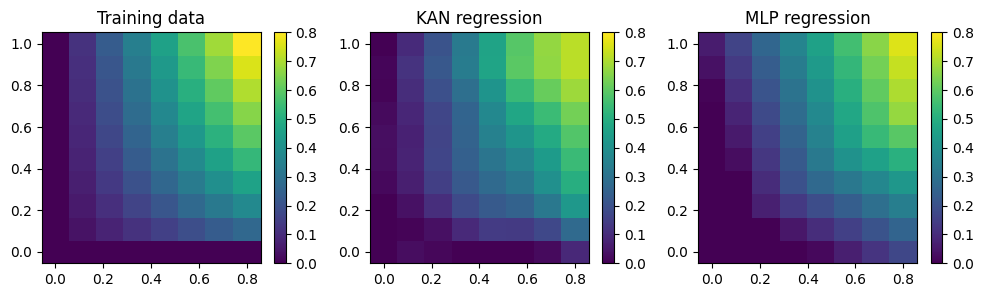

In [12]:
Y_kan = np.array([kan_2d(xx) for xx in x_train2d])
Y_mlp = np.array([mlp_2d(xx) for xx in x_train2d])

f, a = plt.subplots(1, 3, figsize=(12,3))

vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

im0 = a[0].pcolor(X1, X2, Y_training, vmin=vmin, vmax=vmax)
f.colorbar(im0, ax=a[0])
a[0].set_title('Training data')

im1 = a[1].pcolor(X1, X2, Y_kan.reshape(X1.shape), vmin=vmin, vmax=vmax)
f.colorbar(im1, ax=a[1])
a[1].set_title('KAN regression')

im2 = a[2].pcolor(X1, X2, Y_mlp.reshape(X1.shape), vmin=vmin, vmax=vmax)
f.colorbar(im2, ax=a[2])
a[2].set_title('MLP regression')

fig.tight_layout()
plt.show()

### Loss evolution

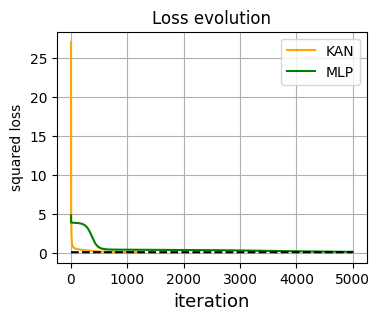

In [13]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(kan_2d.loss_hist, '-', color=color_plots['kan'], label='KAN')
ax1.plot(mlp_2d.loss_hist, '-', color=color_plots['mlp'], label='MLP')
ax1.plot(loss_tol_2d * np.ones(max(len(mlp_2d.loss_hist), len(kan_2d.loss_hist))), '--k')
ax1.grid()
ax1.set_ylabel('squared loss')
ax1.set_xlabel('iteration', fontsize=13)
ax1.legend()
ax1.set_title('Loss evolution')
plt.show()

## **Classification**

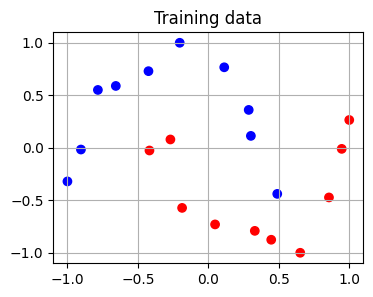

In [23]:
from sklearn import datasets

n_samples = 20
noise = 0.1
x_train_cl, y_train_cl = datasets.make_moons(n_samples=n_samples, noise=noise)
# normalize between -1 and 1
x_train_cl[:, 0] = (x_train_cl[:, 0] - min(x_train_cl[:, 0])) / max(x_train_cl[:, 0] - min(x_train_cl[:, 0])) * 2 - 1
x_train_cl[:, 1] = (x_train_cl[:, 1] - min(x_train_cl[:, 1])) / max(x_train_cl[:, 1] - min(x_train_cl[:, 1])) * 2 - 1

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax.grid()
ax.set_title("Training data")
plt.show()

## Training
### Parameters

In [15]:
n_iter_train_cl = int(5e3)
loss_tol_cl = 1.5
seed = 476

### KAN

In [16]:
from loss.cross_entropy_loss import CrossEntropyLoss

kan_cl = FeedForward([2, 2],  # layer size
                     eps=.01,  # gradient descent parameter
                     n_par_per_edge=8,  # n. basis
                     neuron_class=NeuronKAN, 
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_basis=get_bsplines,  # basis type (B-splines ot Chebyshev)
                     seed=seed,
                     params_range=[-1, 1])
kan_cl.train(x_train_cl, 
             y_train_cl.reshape(-1, 1), 
             n_iter_max=n_iter_train_cl, 
             loss_tol=loss_tol_cl)

100%|████████████████████████████████████████████████████████████████| 5000/5000 [00:41<00:00, 121.74it/s, loss: 2.917]


### MLP

In [17]:
mlp_cl = FeedForward([2, 10, 10, 2],  # layer size
                     eps=.01,  # gradient descend parameter
                     activation=tanh_act,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=NeuronNN, 
                     loss=CrossEntropyLoss,
                     seed=seed, 
                     params_range=[-1, 1])
mlp_cl.train(x_train_cl, 
             y_train_cl.reshape(-1, 1), 
             n_iter_max=n_iter_train_cl, 
             loss_tol=loss_tol_cl)

100%|█████████████████████████████████████████████████████████████████| 5000/5000 [01:01<00:00, 81.93it/s, loss: 4.549]


## Plots

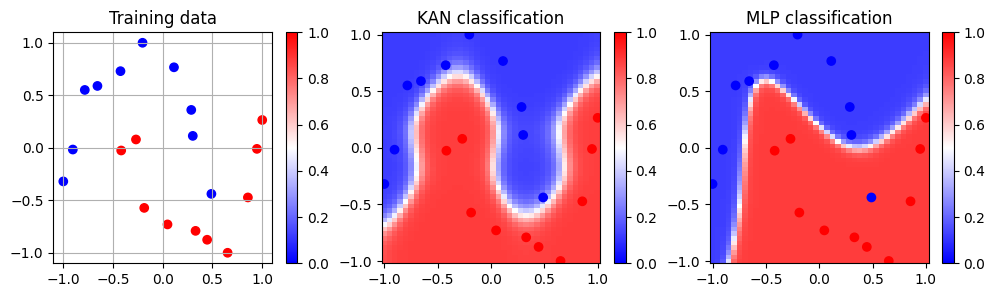

In [27]:
def softmax(vec):
    return np.exp(vec) / sum(np.exp(vec))

X1_cl, X2_cl = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 50))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

Y_kan_cl = np.array([softmax(kan_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)
Y_mlp_cl = np.array([softmax(mlp_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)

fig_cl, ax_cl = plt.subplots(1, 3, figsize=(12,3))
# vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

ax_cl[0].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[0].grid()
ax_cl[0].set_title('Training data')

im0 = ax_cl[1].pcolor(X1_cl, X2_cl, Y_kan_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[1].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[1].set_title('KAN classification')

im1 = ax_cl[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[2].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[2].set_title('MLP classification')

fig_cl.colorbar(im1, ax=ax_cl[0])
fig_cl.colorbar(im1, ax=ax_cl[1])
fig_cl.colorbar(im1, ax=ax_cl[2])
plt.show()

### Loss evolution

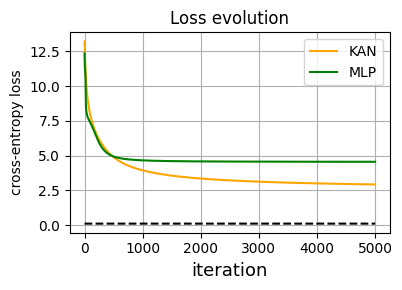

In [29]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(kan_cl.loss_hist, '-', color=color_plots['kan'], label='KAN')
ax1.plot(mlp_cl.loss_hist, '-', color=color_plots['mlp'], label='MLP')
ax1.plot(loss_tol_cl * np.ones(max(len(mlp_cl.loss_hist), len(kan_cl.loss_hist))), '--k')
ax1.grid()
ax1.set_ylabel('cross-entropy loss')
ax1.set_xlabel('iteration', fontsize=13)
ax1.legend()
ax1.set_title('Loss evolution')
fig1.tight_layout()
plt.show()